In [ ]:
import  pandas as pd
from ast import increment_lineno
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import copy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import joblib
from tkinter import *
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [ ]:
df=pd.read_csv("Health_insurance.csv")
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
print(f'Shape of the data: {df.shape}')
print(f'There are {df.shape[0]} rows in the data.')

Shape of the data: (1338, 7)
There are 1338 rows in the data.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df_cat=df.select_dtypes(np.object)
df_num=df.select_dtypes(np.number)

In [ ]:
df_num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [ ]:
df_cat

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


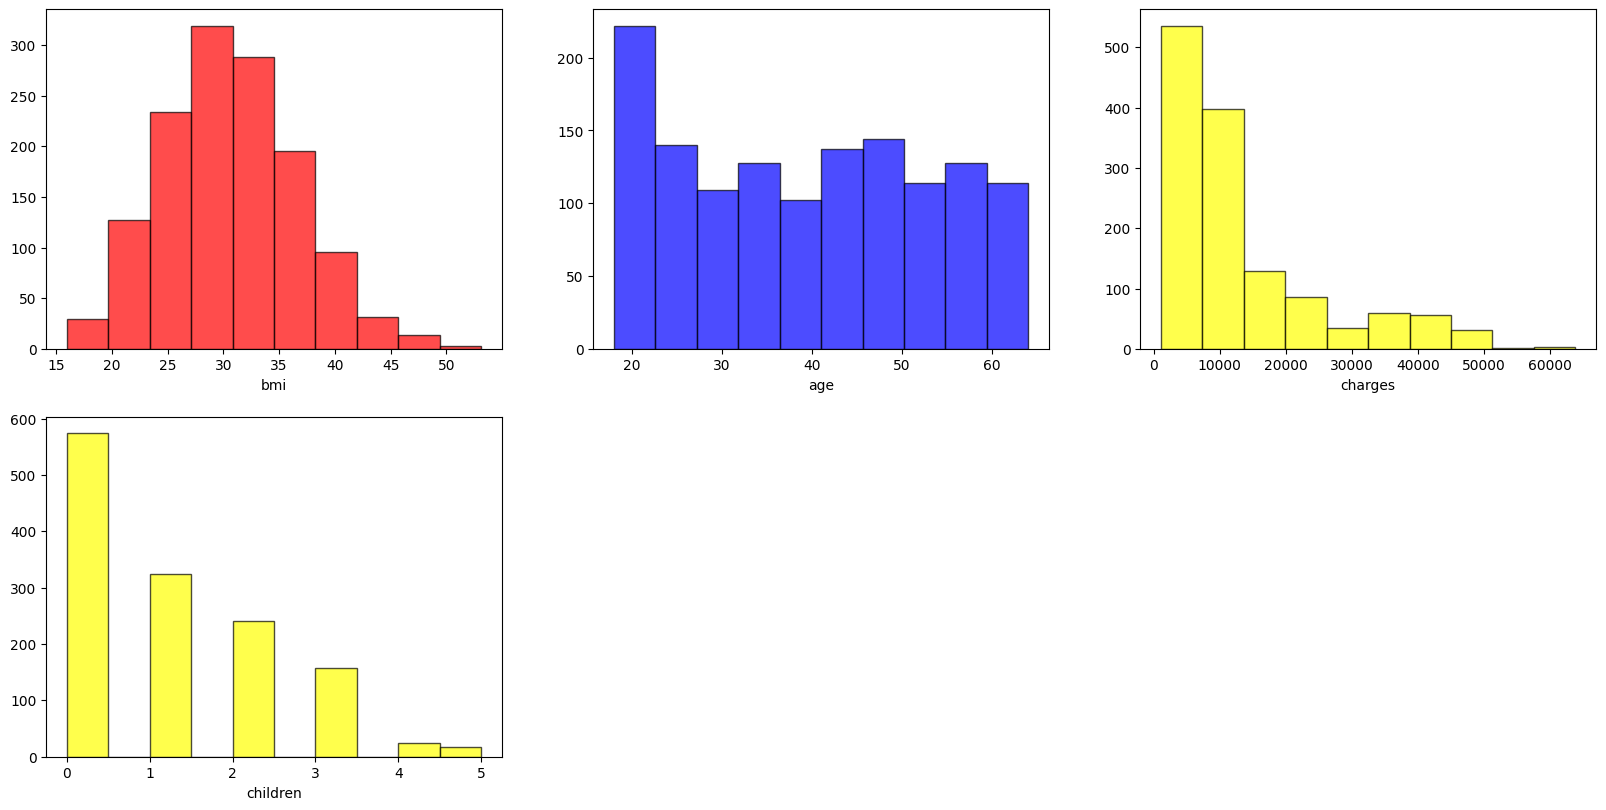

In [ ]:
#Plots to see the distribution of the continuous features individually
#Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='yellow', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.subplot(3,3,4)
plt.hist(df.children, color='yellow', edgecolor = 'black', alpha = 0.7)
plt.xlabel('children')

plt.show()

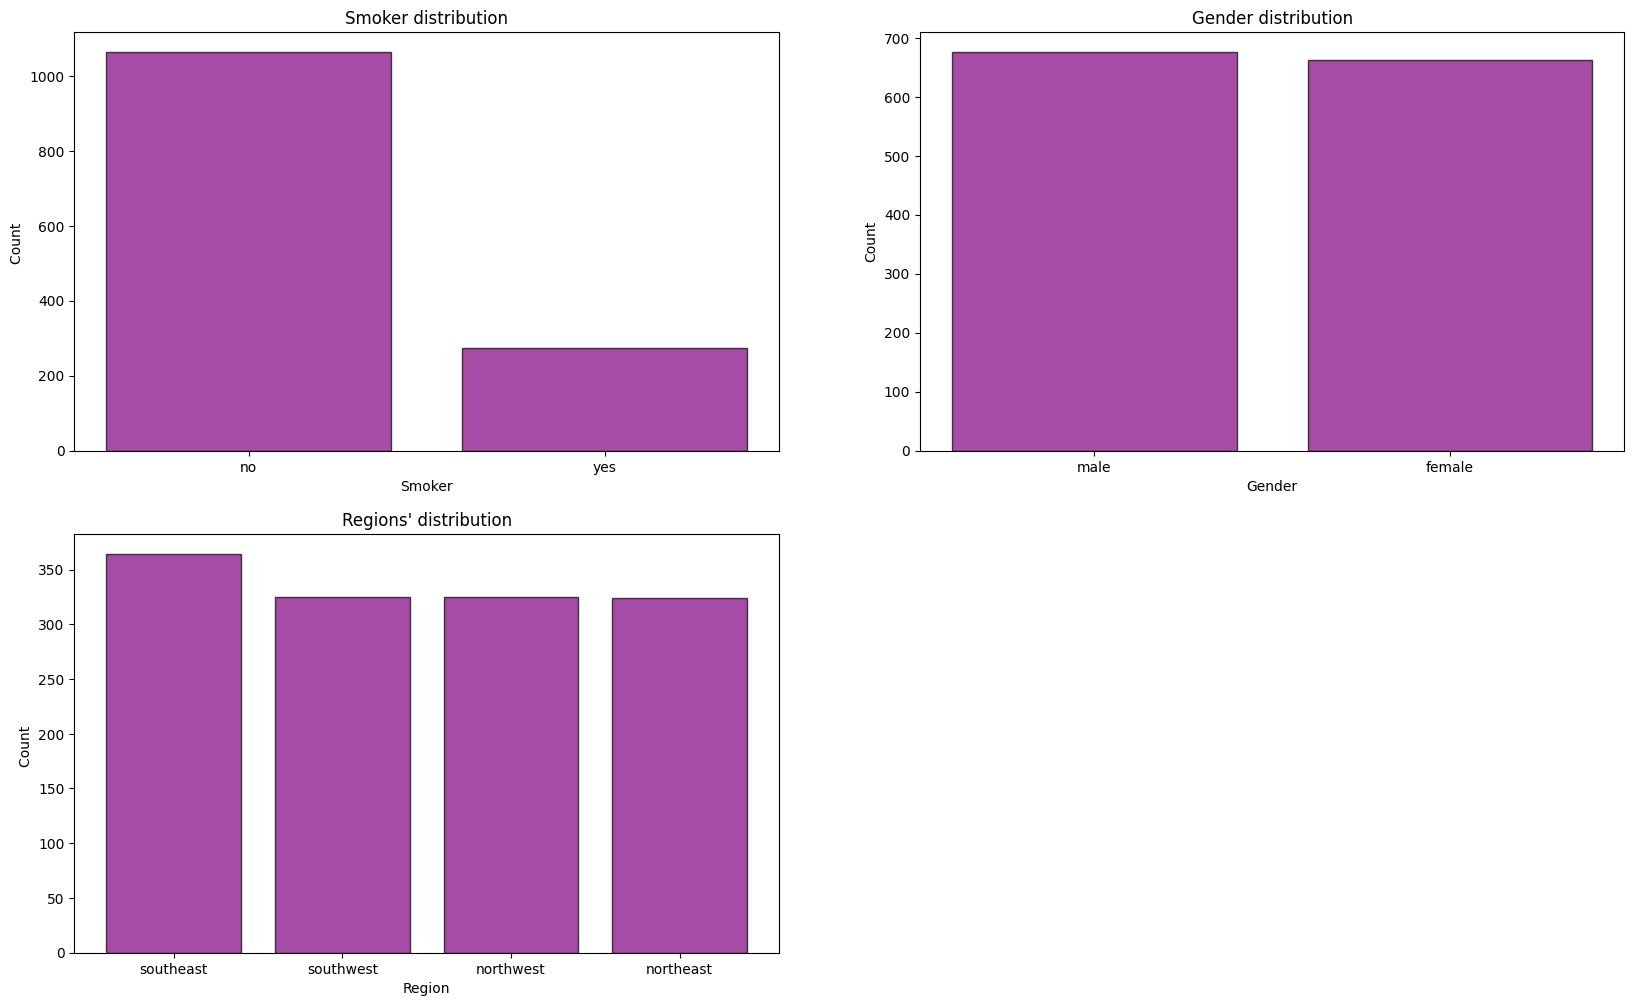

In [ ]:
#Distribution of categorical columns - 'smoker','sex','region' & 'children'

plt.figure(figsize=(20,25))


x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'purple',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker')
plt.ylabel('Count ')
plt.title('Smoker distribution')
x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'purple',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'purple',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")


plt.show()

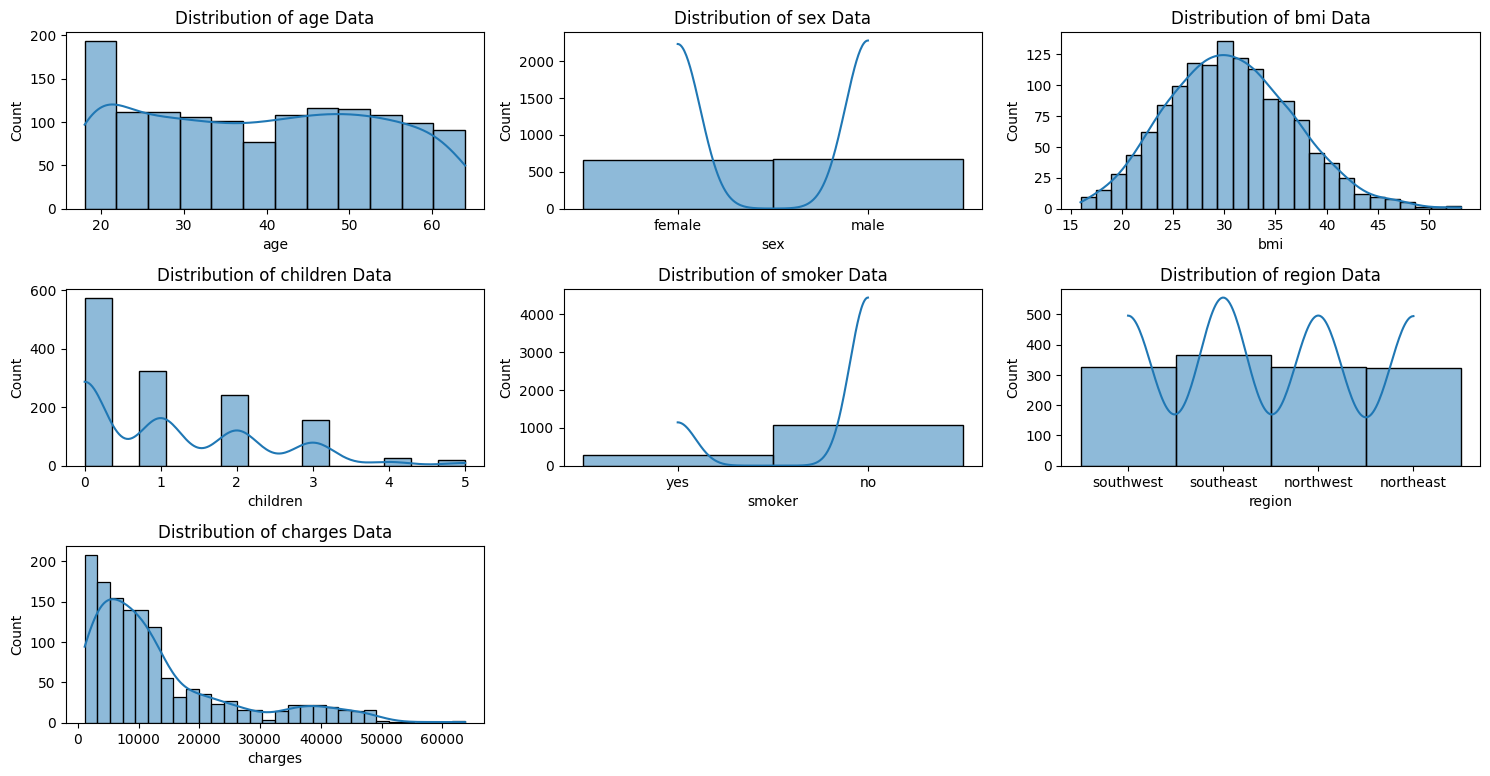

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [ ]:
# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


In [ ]:
charges = np.log(df["charges"])
charges.head(5)

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

In [ ]:
charges.skew()

-0.09009752473024582

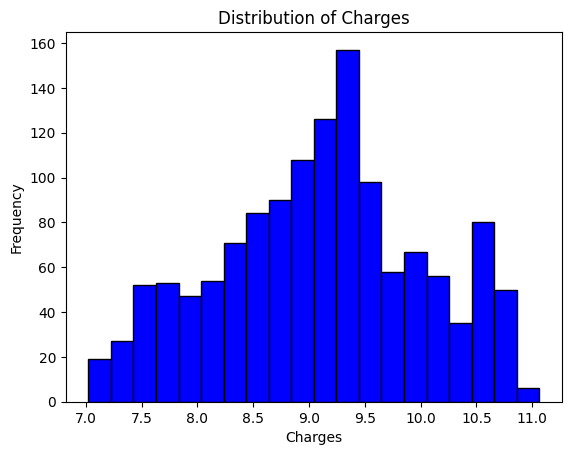

In [ ]:
plt.hist(charges, bins=20, color='blue', edgecolor='black')

# Add labels and a title
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')

# Show the histogram
plt.show()

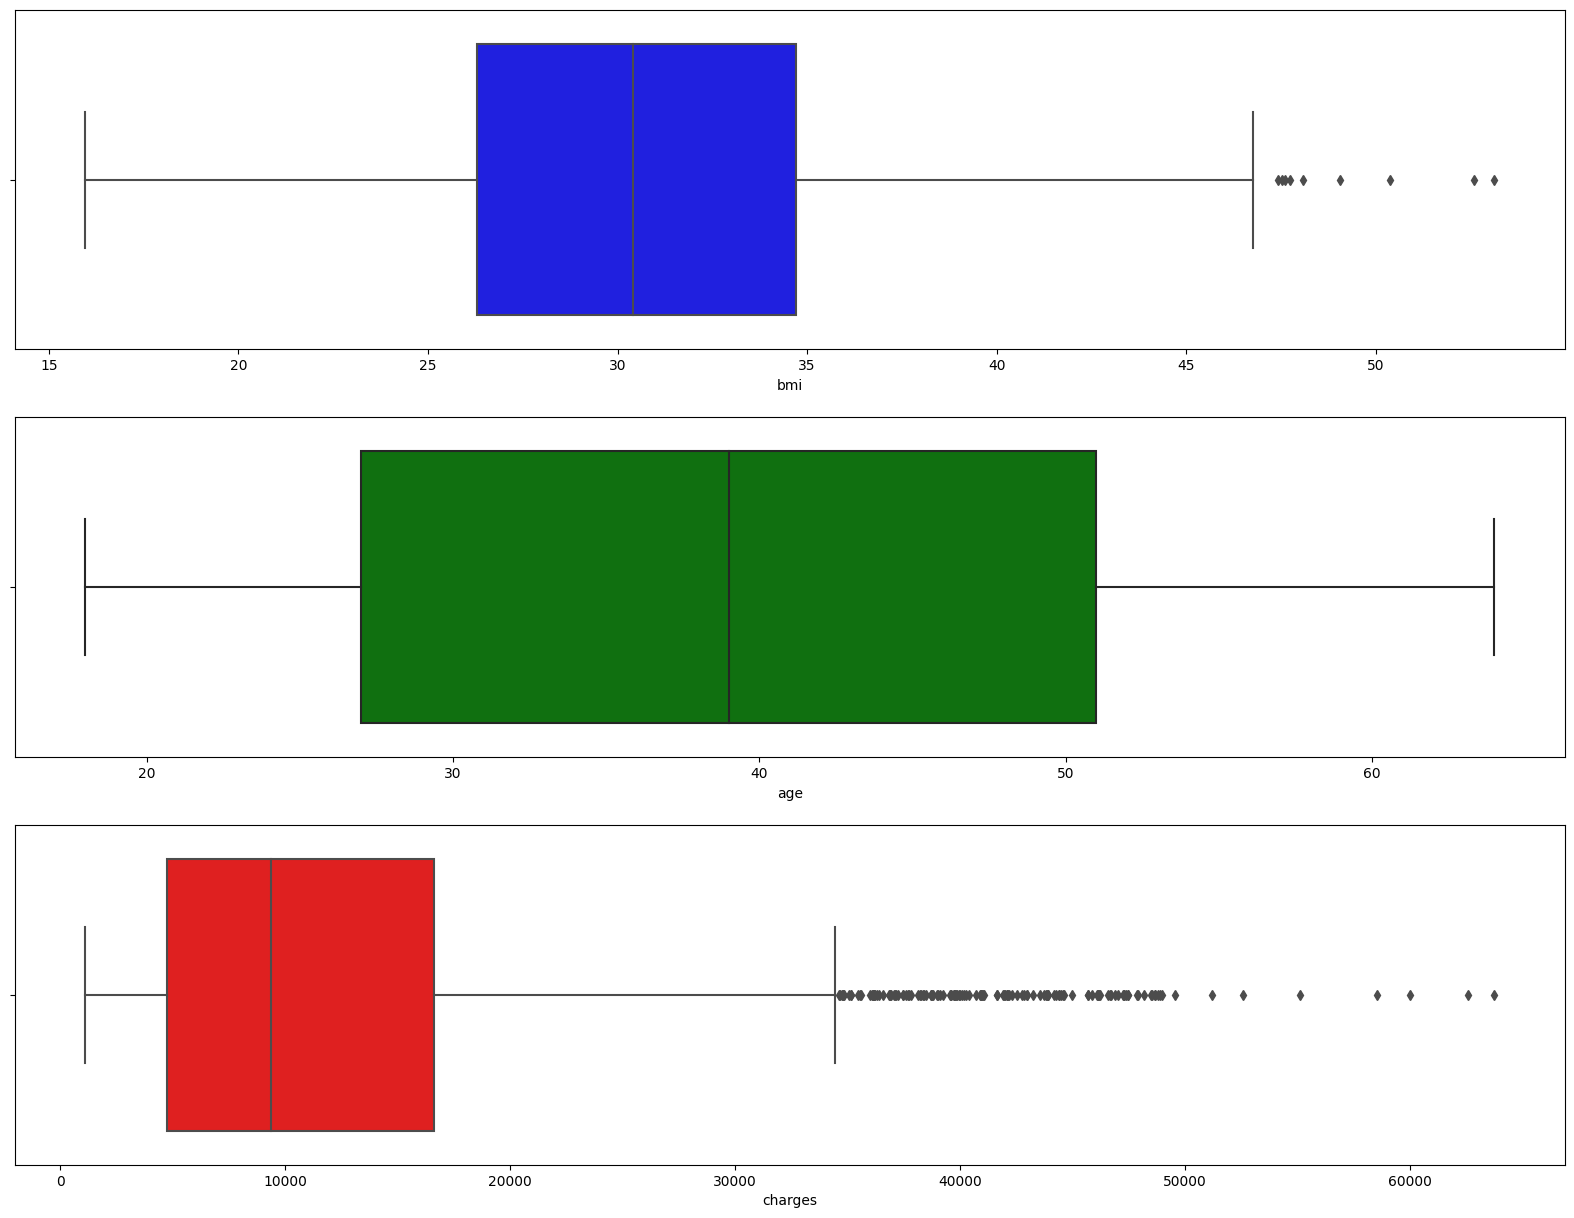

In [ ]:
# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='blue')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='green')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='red')

plt.show()

In [ ]:
df1=df[df['bmi']<45]

In [ ]:
df1['bmi'].mean()

30.407143399089527

In [ ]:
df1=df[df['charges']<3500]

In [ ]:
df1['charges'].mean()

2261.388053030303

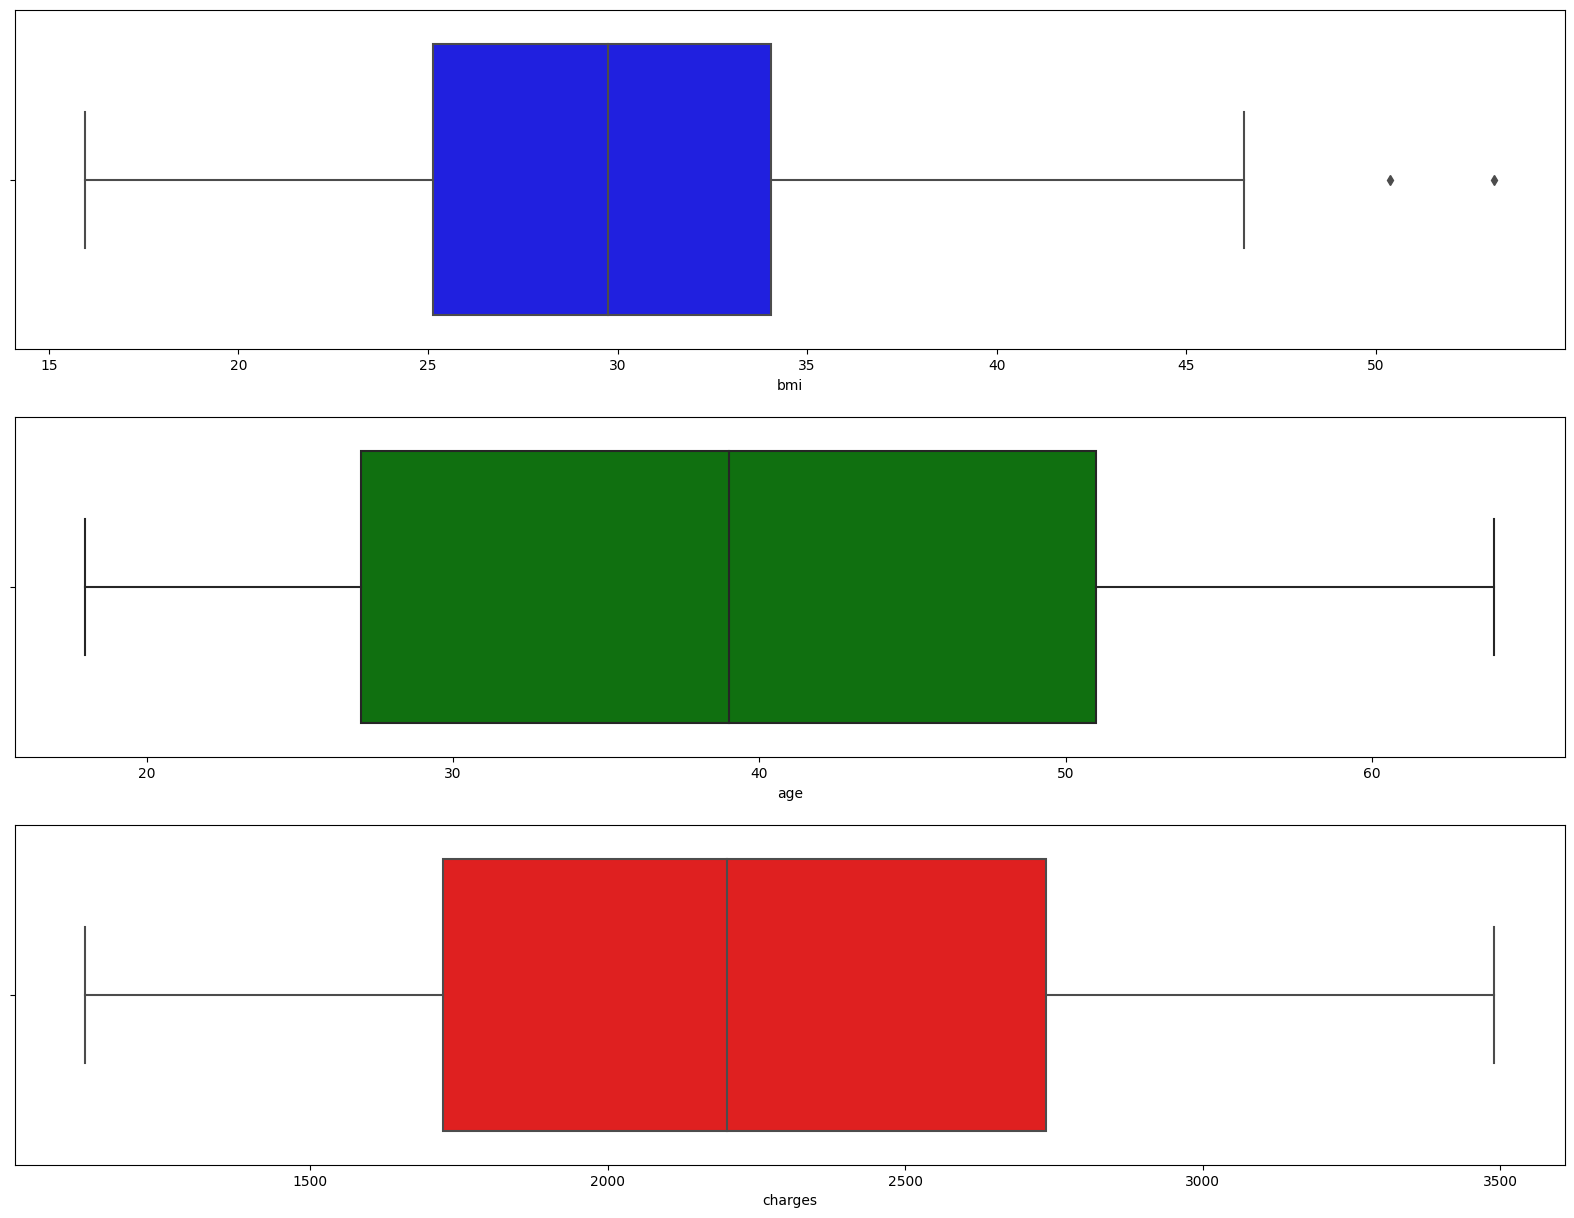

In [ ]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df1.bmi, color='blue')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='green')

plt.subplot(3,1,3)
sns.boxplot(x= df1.charges, color='red')

plt.show()

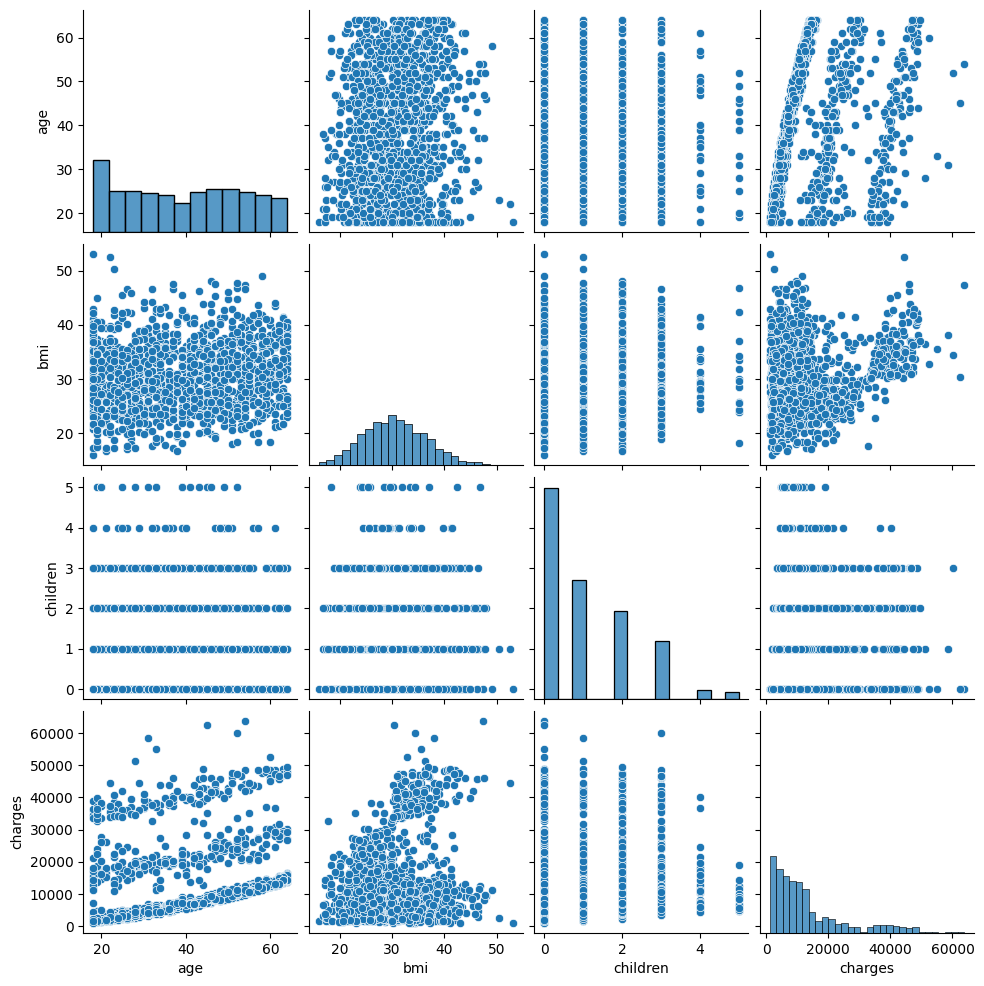

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           7.39e-37
Time:                        17:47:24   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6424.8046   1744.091     -3.684      0.0

In [ ]:
sns.pairplot(df)
plt.show()

# Perform multiple regression analysis
X = df[['age', 'bmi']]
X = sm.add_constant(X)
y = df['charges']

model = sm.OLS(y, X).fit()
print(model.summary())

In [ ]:
# Chi_square test to check if smoking habits are different for people of different regions
Null = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Alt = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['smoker'], df['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Null} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Alt} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has an effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [ ]:
smokers = df[df['smoker'] == 0]
nonsmokers = df[df['smoker'] == 1]
charge_smokers = smokers['charges']
charge_nonsmokers = nonsmokers['charges']

print(f'Number of smokers: {smokers.shape[0]}')
print(f'Variance in charges of smokers: {np.var(charge_smokers)}')
print(f'Number of non - smokers: {nonsmokers.shape[0]}')
print(f'Variance in charges of non - smokers: {np.var(charge_nonsmokers)}')

Number of smokers: 0
Variance in charges of smokers: nan
Number of non - smokers: 0
Variance in charges of non - smokers: nan


In [ ]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(charge_smokers, charge_nonsmokers, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: nan
p_value: nan


In [ ]:
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= nan


In [ ]:
p_value > 0.05

False

In [ ]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [ ]:
df['smoker']=df['smoker'].map({'yes':0,'no':1})

In [ ]:
df['region']=df['region'].map({'northwest':1,'southwest':2,'southeast':3,'northeast':4})



<Axes: >

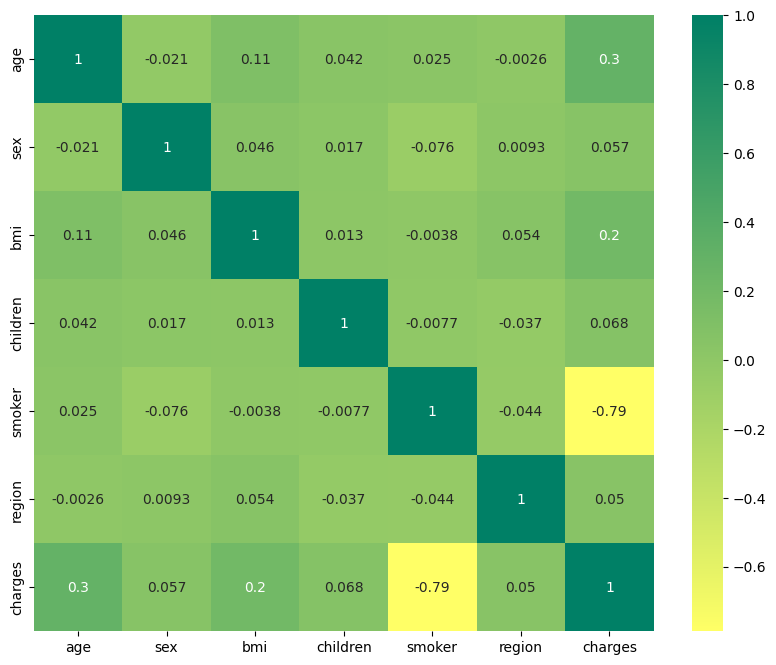

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')

<Figure size 1000x600 with 0 Axes>

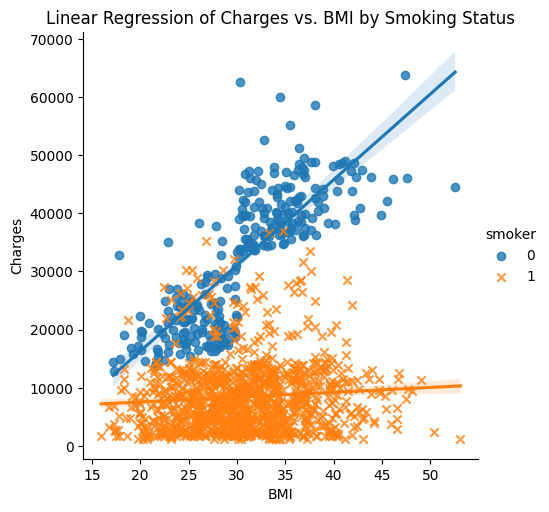

In [ ]:
# Encode 'smoking status' as a categorical variable
df['smoker'] = df['smoker'].astype('category')


# Create a scatterplot with linear regression for charges vs. bmi, considering smoking status
plt.figure(figsize=(10, 6))
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', markers=['o', 'x'])
plt.title('Linear Regression of Charges vs. BMI by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

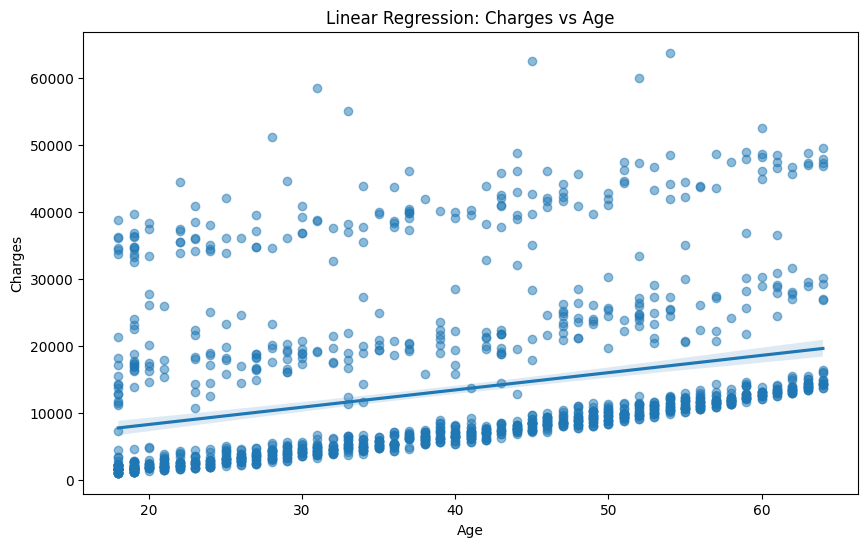

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='charges', data=df, scatter_kws={'alpha':0.5})

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression: Charges vs Age')

# Show the plot
plt.show()





In [ ]:
X = df.drop(['charges'],axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,2
1,18,1,33.770,1,1,3
2,28,1,33.000,3,1,3
3,33,1,22.705,0,1,1
4,32,1,28.880,0,1,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,1
1334,18,0,31.920,0,1,4
1335,18,0,36.850,0,1,3
1336,21,0,25.800,0,1,2


In [ ]:
Y = df['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [ ]:
lr= LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred =lr.predict(X_test)
y_pred

array([ 8755.82313828,  6773.44053983, 36593.41289767,  9234.61837437,
       26653.78875406, 11023.81883547,   -54.57524623, 16550.90782803,
         943.09389447, 10969.31911393, 28446.87757793,  9101.48647876,
        5521.55566801, 38561.82969537, 40406.32176169, 37274.21675775,
       15377.51348785, 36094.30131663,  9392.83639548, 31189.3792777 ,
        4217.8521542 , 10403.09646661,  2647.40176605,  6759.04999844,
       11045.77740792, 12664.66482285, 14739.97647605,  5872.38690264,
        9736.31362139,  2434.96288438,  9418.29542073, 12767.51360488,
        4758.61684136,  3228.37386556,  4748.23695592, 12672.30188145,
        2290.20391646,  9095.69327834, 33035.05447843, 32790.71036115,
        4215.68495284,  4030.31307484, 14369.70821405, 11196.06645633,
        8989.34373467, 12423.06063899,  4953.99004295,  3493.56579624,
       35704.25610603,  9337.66784671, 16034.13915412,  2613.50362031,
       11959.59250687,  1252.38075623, 13616.05560568, 12304.03986159,
      

In [ ]:
print (lr.coef_)

[ 2.57334934e+02 -5.45160552e+00  3.26891659e+02  4.30247314e+02
 -2.36393995e+04  1.29887884e+02]


In [ ]:
print (lr.intercept_)

11205.606958531025


In [ ]:
r2_score(Y_test,y_pred)

0.7809227350368882

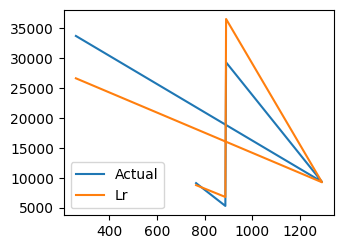

In [ ]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:5],label='Actual')
plt.plot(df1['Lr'].iloc[0:5],label='Lr')
plt.legend()




plt.tight_layout()
plt.legend()

In [ ]:
lr= LinearRegression()
lr.fit(X_train,Y_train)
svm = SVR()
svm.fit(X_train,Y_train)
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [ ]:
Y_pred1 = lr.predict(X_test)
Y_pred2 = svm.predict(X_test)
Y_pred3 = rf.predict(X_test)
Y_pred4 =gr.predict(X_test)

df1=pd.DataFrame({'Actual':Y_test,'Lr':Y_pred1,'svm':Y_pred2,'rf':Y_pred3,'gr':Y_pred4})

In [ ]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8755.823138,9548.193152,9455.567085,10731.941685
887,5272.17580,6773.440540,9492.070844,5604.571468,5831.051454
890,29330.98315,36593.412898,9649.028325,28163.105104,28509.596550
1293,9301.89355,9234.618374,9554.934946,12062.865024,9682.279419
259,33750.29180,26653.788754,9419.856808,34732.630940,33531.443511
...,...,...,...,...,...
109,47055.53210,39272.548191,9649.412521,46990.317916,45700.985045
575,12222.89830,11503.167865,9625.661901,13534.761595,12624.789938
535,6067.12675,7450.420908,9503.815696,6391.421179,6922.538173
543,63770.42801,40989.290631,9605.276965,46546.401320,47820.270382


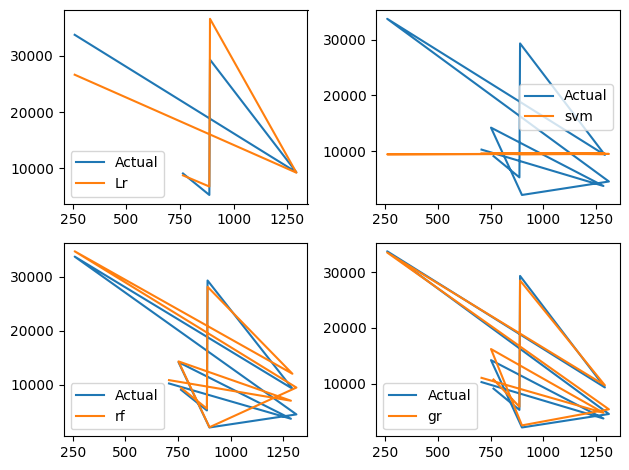

In [ ]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:5],label='Actual')
plt.plot(df1['Lr'].iloc[0:5],label='Lr')
plt.legend()


plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:10],label='Actual')
plt.plot(df1['svm'].iloc[0:10],label='svm')
plt.legend()


plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:10],label='Actual')
plt.plot(df1['rf'].iloc[0:10],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:10],label='Actual')
plt.plot(df1['gr'].iloc[0:10],label='gr')

plt.tight_layout()
plt.legend()

In [ ]:
score1 = metrics.r2_score(Y_test,Y_pred1)
score2 = metrics.r2_score(Y_test,Y_pred2)
score3 = metrics.r2_score(Y_test,Y_pred3)
score4 = metrics.r2_score(Y_test,Y_pred3)
print(score1,score2,score3,score4)

0.7809227350368882 -0.07228434659803207 0.8593830209124105 0.8593830209124105


In [ ]:
s1 =metrics.mean_absolute_error(Y_test,Y_pred1)
s2 =metrics.mean_absolute_error(Y_test,Y_pred2)
s3 =metrics.mean_absolute_error(Y_test,Y_pred3)
s4 =metrics.mean_absolute_error(Y_test,Y_pred4)
print(s1,s2,s3,s4)

4211.922392445529 8592.17909533713 2579.1507314018977 2383.4007855044347


In [ ]:
data = {	'age':19,
       'sex': 0,'bmi':	27.900,'children':0,'smoker' :	0, 'region':	2
}
df =pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,0,2


In [ ]:
new_pred = gr.predict(df)
print(new_pred)


[17921.72785527]


In [ ]:
gr =GradientBoostingRegressor()
gr.fit(X,Y)

GradientBoostingRegressor()

In [ ]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [ ]:
model=joblib.load('model_joblib_gr')

In [ ]:
model.predict(df)

array([18456.13263041])